In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 3rd month\Steel_industry_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [17]:
df['Load_Type'].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [21]:
non_num_row = df[~df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notna().all(axis=1)]

In [3]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [4]:
df.drop(columns=['date'], inplace=True)

In [5]:
df['Load_Type'] = df['Load_Type'].map({
  'Light_Load': 0,
  'Medium_Load': 1,
  'Maximum_Load': 2
})

In [6]:
cat_col = df.select_dtypes(include='object').columns

In [7]:
le = LabelEncoder()
for col in cat_col:
  df[col] = le.fit_transform(df[col])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  int64         
 9   Day_of_week                           35040 non-null  int64         
 10

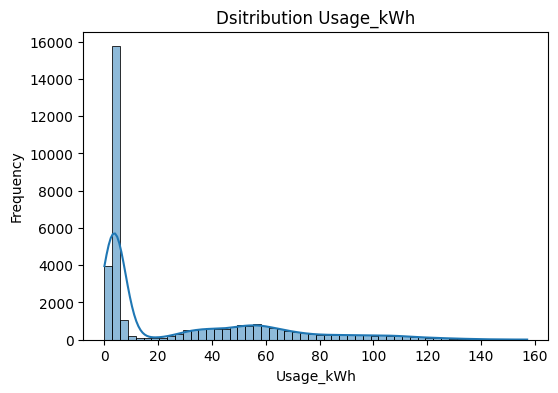

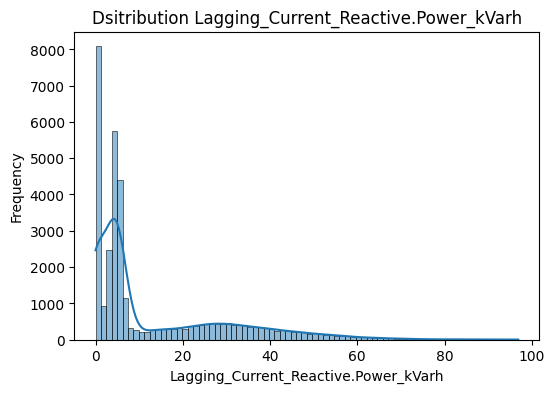

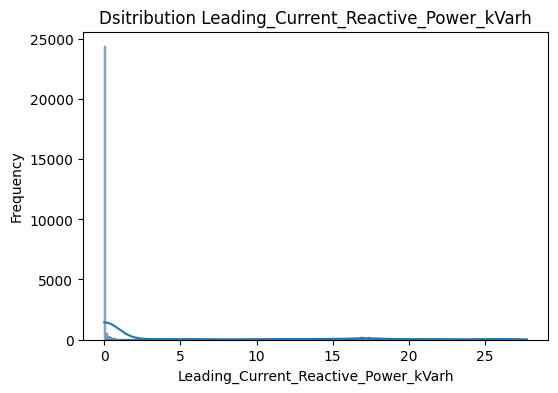

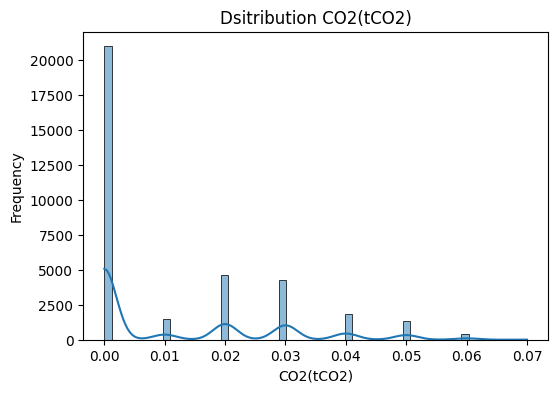

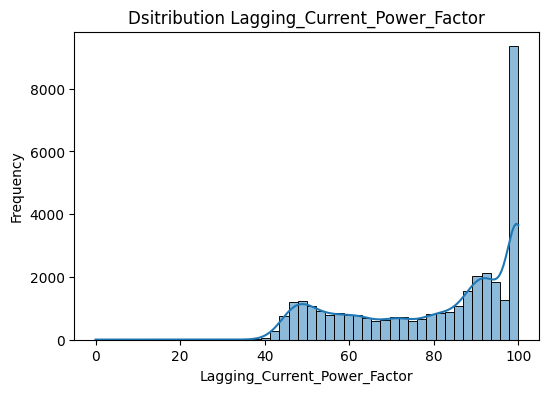

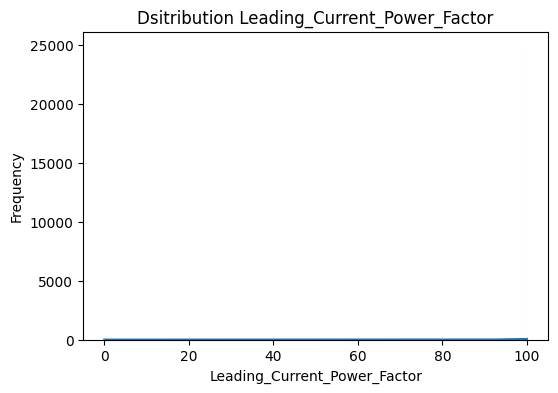

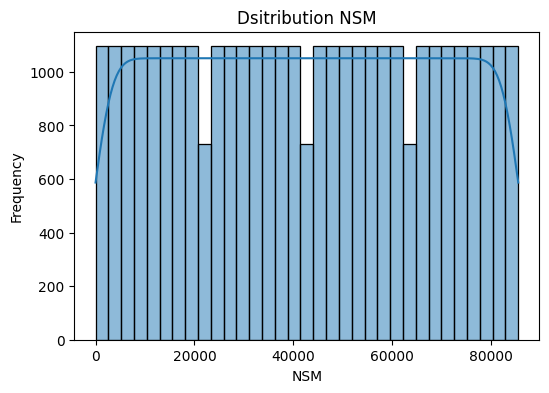

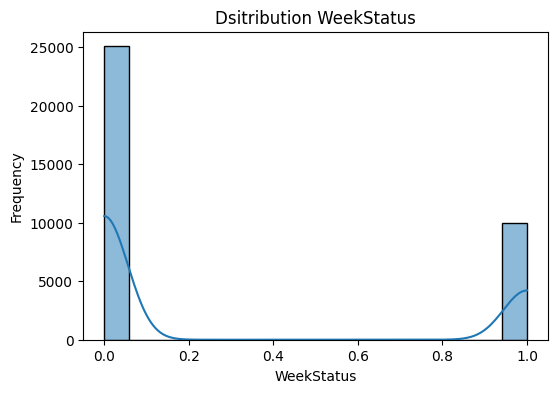

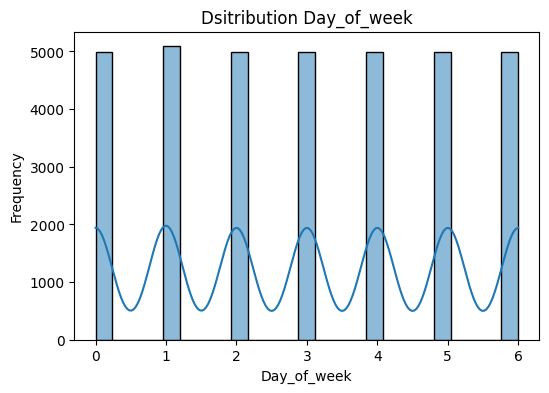

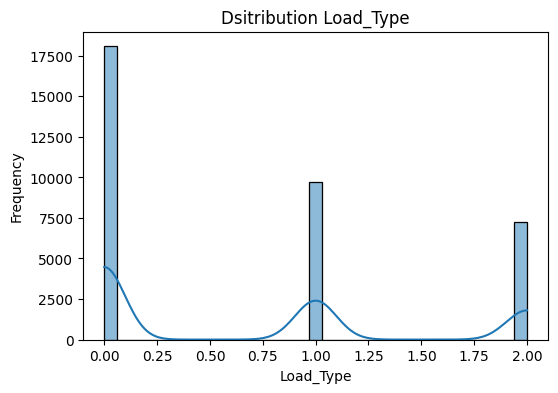

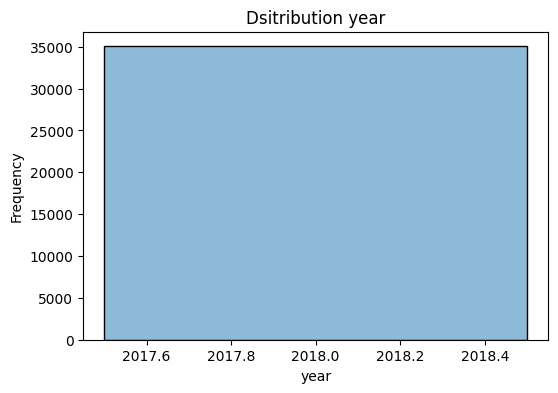

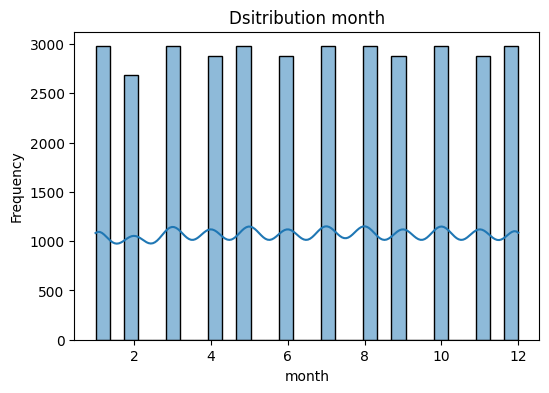

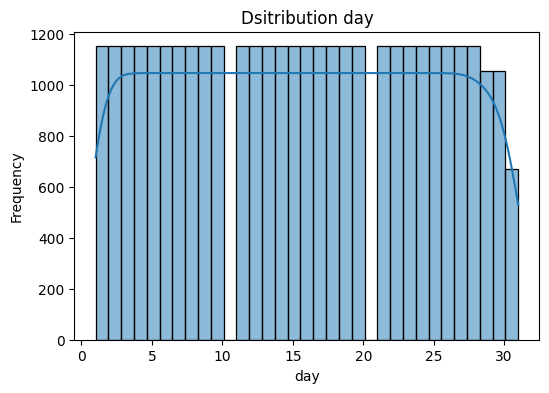

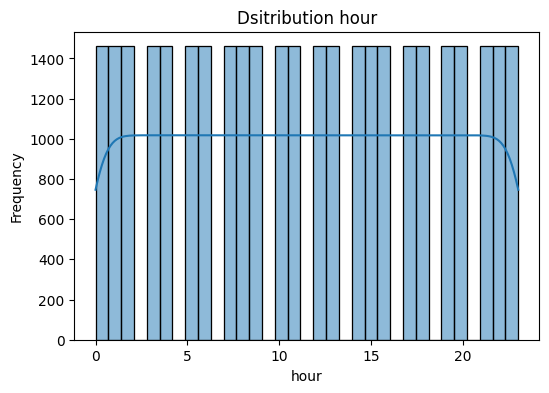

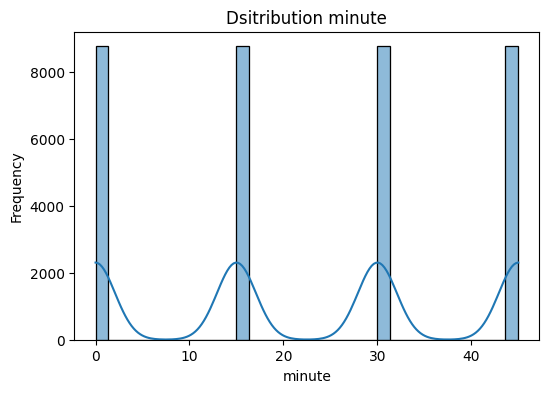

In [34]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Dsitribution {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
skewness = df.skew(numeric_only=True)
skewness


Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355
Lagging_Current_Power_Factor           -0.606126
Leading_Current_Power_Factor           -1.511984
NSM                                     0.000000
WeekStatus                              0.952975
Day_of_week                             0.005480
Load_Type                               0.606465
year                                    0.000000
month                                  -0.010457
day                                     0.007521
hour                                    0.000000
minute                                  0.000000
dtype: float64

In [39]:
normal_cols = skewness[abs(skewness) <= 0.5].index.to_list()
skewed_cols = skewness[abs(skewness) > 0.5].index.to_list()
print(normal_cols)
print(skewed_cols)

['NSM', 'Day_of_week', 'year', 'month', 'day', 'hour', 'minute']
['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'WeekStatus', 'Load_Type']


In [40]:
df[skewed_cols] = df[skewed_cols].apply(np.log1p)

In [12]:
scaler = StandardScaler()

x = df.drop(columns=['Load_Type'])
y = df['Load_Type']

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
df = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1) 


In [13]:
df.head(3)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,year,month,day,hour,minute,Load_Type
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,-0.631243,-0.997264,0.0,-1.602745,-1.673503,-1.661325,-0.447214,0
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,-0.631243,-0.997264,0.0,-1.602745,-1.673503,-1.661325,0.447214,0
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,-0.631243,-0.997264,0.0,-1.602745,-1.673503,-1.661325,1.341641,0


In [45]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [46]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = model.predict(x_val)

In [48]:
cl_report = classification_report(y_test, y_pred)

In [49]:
print(cl_report)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1807
           1       0.30      0.30      0.30       970
           2       0.20      0.20      0.20       727

    accuracy                           0.40      3504
   macro avg       0.34      0.34      0.34      3504
weighted avg       0.40      0.40      0.40      3504



In [50]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[1793,   10,    5],
       [   8,  960,    1],
       [   3,    2,  722]])

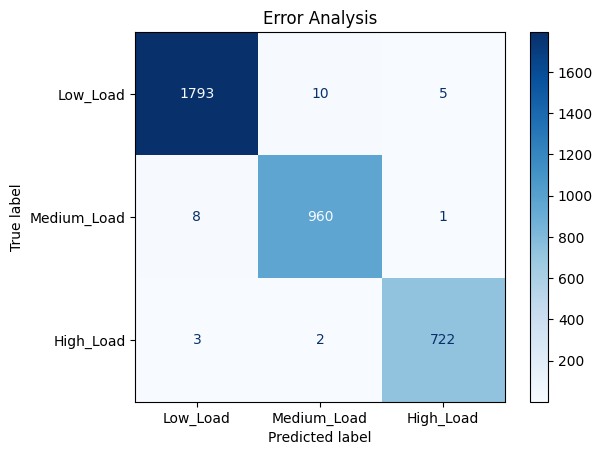

In [51]:
class_names = ['Low_Load', 'Medium_Load', 'High_Load']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Error Analysis')
plt.show()

In [52]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

Load_Type
0    14457
1     7757
2     5818
Name: count, dtype: int64
Load_Type
0    1808
1     969
2     727
Name: count, dtype: int64
Load_Type
0    1807
1     970
2     727
Name: count, dtype: int64


In [53]:
df_im = pd.concat([
  df[df['Load_Type'] == 0],
  df[df['Load_Type'] == 1],
  df[df['Load_Type'] == 2].sample(10, random_state=42)
])

df_train, df_test = train_test_split(df_im, stratify=df_im['Load_Type'], random_state=42)

x_train = df_train.drop(columns='Load_Type')
y_train = df_train['Load_Type']

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [54]:
x_train.shape

(20833, 14)

In [55]:
x_resampled.shape

(40662, 14)

In [56]:
model = RandomForestClassifier()
model.fit(x_resampled, y_resampled)

RandomForestClassifier()

In [57]:
y_pred = model.predict(x_test)

In [58]:
cl_report = classification_report(y_test, y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.47      0.82      0.60      1807
           1       0.11      0.04      0.06       970
           2       0.00      0.00      0.00       727

    accuracy                           0.44      3504
   macro avg       0.19      0.29      0.22      3504
weighted avg       0.27      0.44      0.33      3504

